In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# import sys
# sys.path.append("/home/z5297792/UNSW-MRes/MRes/modules") 
# from utils import dopioe, compute_tilt_data, bearing

with open('/srv/scratch/z5297792/Chapter2/SEACOFS_26yr_Eddy_Dataset/Eddy_Data/Vertical_Eddy_Dataset/dic_vert_eddies.pkl', 'rb') as f:
    dic_eddies_vert = pickle.load(f)

df_eddies = pd.read_pickle('/srv/scratch/z5297792/Chapter2/SEACOFS_26yr_Eddy_Dataset/Eddy_Data/df_eddies_processed_1462_10650.pkl')

df_tilt_data = pd.read_pickle("/srv/scratch/z5297792/Chapter2/SEACOFS_26yr_Eddy_Dataset/Eddy_Data/Vertical_Eddy_Dataset/df_tilt_data.pkl")

df_eddies = df_eddies.merge(
    df_tilt_data[['Eddy', 'Day', 'TiltDis', 'TiltDir']],
    how='left',
    left_on=['Eddy', 'Day'],
    right_on=['Eddy', 'Day']
)
df_eddies


,Eddy,Day,Cyc,Lon,Lat,ic,jc,xc,yc,w,...,q22,Rc,psi0,A,R,Age,Date,fname,TiltDis,TiltDir
0,1,1462,CE,156.969773,-28.461100,179,274,505.897600,1353.012251,-0.000033,...,0.943344,104.677927,71.391686,-0.006515,69.250036,57,1994-01-02,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
1,1,1463,CE,156.993096,-28.433992,179,275,507.149717,1356.633687,-0.000030,...,0.950849,110.542281,77.351002,-0.006330,62.000626,57,1994-01-03,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
2,1,1464,CE,157.097940,-28.381485,181,276,515.130000,1365.650728,-0.000028,...,1.006892,115.245476,75.250400,-0.005666,67.000485,57,1994-01-04,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
3,1,1465,CE,157.094334,-28.315658,181,278,512.570772,1372.426342,-0.000033,...,1.200119,114.738549,72.789618,-0.005529,66.501582,57,1994-01-05,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,31.669332,89.546110
4,1,1466,CE,157.106324,-28.346479,181,277,514.728351,1369.599726,-0.000029,...,1.214160,100.425496,58.705551,-0.005821,56.251116,57,1994-01-06,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,33.600109,92.955602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105233,2631,10646,AE,157.825620,-37.030656,248,97,850.502045,476.447416,0.000013,...,1.156400,114.894173,-41.491437,0.003143,72.751791,24,2019-02-24,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,12.848125,334.097803
105234,2631,10647,AE,157.880796,-36.972725,249,98,853.608024,484.316677,0.000014,...,1.238286,111.853372,-42.195517,0.003373,73.000933,24,2019-02-25,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,13.627106,324.784689
105235,2631,10648,AE,157.868516,-36.874363,248,100,849.759258,494.400614,0.000014,...,1.163994,107.180060,-43.102690,0.003752,75.750780,24,2019-02-26,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
105236,2631,10649,AE,157.753058,-36.882303,246,99,840.037603,489.981707,0.000013,...,1.203104,100.368133,-37.967048,0.003769,75.750006,24,2019-02-27,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN


In [2]:
import netCDF4 as nc
from scipy.interpolate import griddata
import netCDF4 as nc
from scipy.interpolate import RegularGridInterpolator

# Field Data

fname = f'/srv/scratch/z3533156/26year_BRAN2020/outer_avg_01461.nc'

dataset = nc.Dataset(fname)

lon_rho = np.transpose(dataset.variables['lon_rho'], axes=(1, 0))
lat_rho = np.transpose(dataset.variables['lat_rho'], axes=(1, 0))
mask_rho = np.transpose(dataset.variables['mask_rho'], axes=(1, 0))
h = np.transpose(dataset.variables['h'], axes=(1, 0))
# f = np.transpose(dataset.variables['f'], axes=(1, 0))
angle = dataset.variables['angle'][0, 0]
z_r = np.load('/srv/scratch/z5297792/z_r.npy')
z_r = np.transpose(z_r, (1, 2, 0))

def distance(lat1, lon1, lat2, lon2):
    EARTH_RADIUS = 6357
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2 - lat1, lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return EARTH_RADIUS * 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

j_mid = lon_rho.shape[1] // 2
i_mid = lon_rho.shape[0] // 2

dx = distance(lat_rho[:-1, j_mid], lon_rho[:-1, j_mid],
              lat_rho[1:, j_mid], lon_rho[1:, j_mid])
dy = distance(lat_rho[i_mid, :-1], lon_rho[i_mid, :-1],
              lat_rho[i_mid, 1:], lon_rho[i_mid, 1:])

x_grid = np.insert(np.cumsum(dx), 0, 0)
y_grid = np.insert(np.cumsum(dy), 0, 0)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid, indexing='ij')


In [3]:
df_eddies


,Eddy,Day,Cyc,Lon,Lat,ic,jc,xc,yc,w,...,q22,Rc,psi0,A,R,Age,Date,fname,TiltDis,TiltDir
0,1,1462,CE,156.969773,-28.461100,179,274,505.897600,1353.012251,-0.000033,...,0.943344,104.677927,71.391686,-0.006515,69.250036,57,1994-01-02,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
1,1,1463,CE,156.993096,-28.433992,179,275,507.149717,1356.633687,-0.000030,...,0.950849,110.542281,77.351002,-0.006330,62.000626,57,1994-01-03,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
2,1,1464,CE,157.097940,-28.381485,181,276,515.130000,1365.650728,-0.000028,...,1.006892,115.245476,75.250400,-0.005666,67.000485,57,1994-01-04,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
3,1,1465,CE,157.094334,-28.315658,181,278,512.570772,1372.426342,-0.000033,...,1.200119,114.738549,72.789618,-0.005529,66.501582,57,1994-01-05,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,31.669332,89.546110
4,1,1466,CE,157.106324,-28.346479,181,277,514.728351,1369.599726,-0.000029,...,1.214160,100.425496,58.705551,-0.005821,56.251116,57,1994-01-06,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,33.600109,92.955602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105233,2631,10646,AE,157.825620,-37.030656,248,97,850.502045,476.447416,0.000013,...,1.156400,114.894173,-41.491437,0.003143,72.751791,24,2019-02-24,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,12.848125,334.097803
105234,2631,10647,AE,157.880796,-36.972725,249,98,853.608024,484.316677,0.000014,...,1.238286,111.853372,-42.195517,0.003373,73.000933,24,2019-02-25,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,13.627106,324.784689
105235,2631,10648,AE,157.868516,-36.874363,248,100,849.759258,494.400614,0.000014,...,1.163994,107.180060,-43.102690,0.003752,75.750780,24,2019-02-26,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
105236,2631,10649,AE,157.753058,-36.882303,246,99,840.037603,489.981707,0.000013,...,1.203104,100.368133,-37.967048,0.003769,75.750006,24,2019-02-27,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN


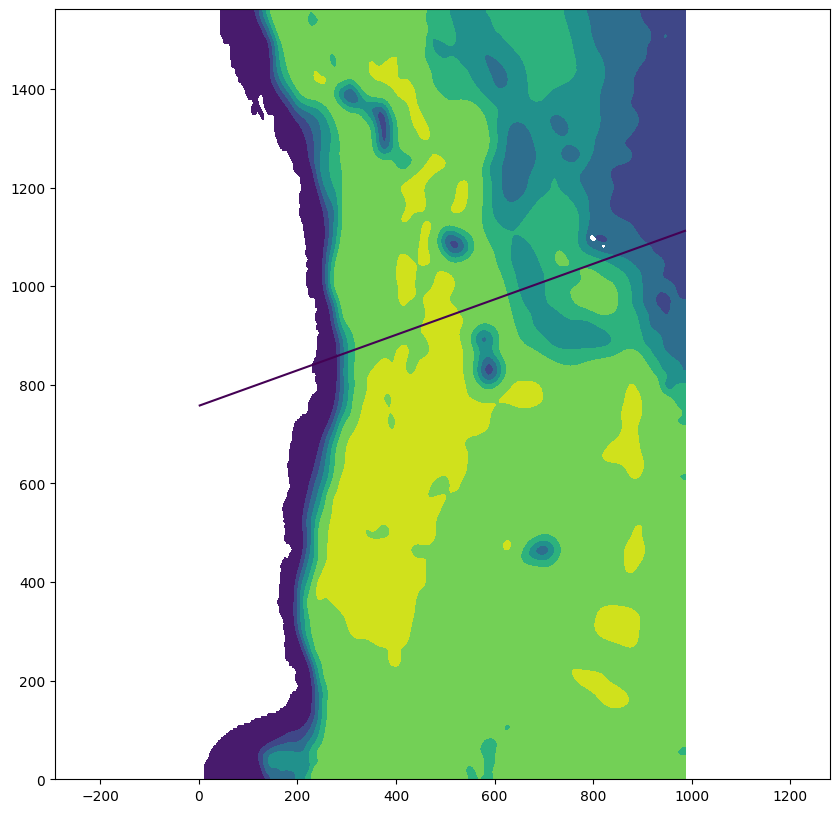

In [4]:
plt.figure(figsize=(10,10))
plt.contourf(X_grid, Y_grid, np.where(mask_rho, h, np.nan))
plt.axis('equal')
plt.contour(X_grid, Y_grid, lat_rho, levels=[-32])


In [5]:
upstream_eddies, downstream_eddies = [], []
for eddy in df_eddies.Eddy.unique():
    df = df_eddies[df_eddies.Eddy==eddy]
    mask = df.yc > 800
    if mask.mean() > .5:
        upstream_eddies.append(eddy)
    else:
        downstream_eddies.append(eddy)

df_upstream_eddies = df_eddies[df_eddies.Eddy.isin(upstream_eddies)].copy()
df_downstream_eddies = df_eddies[df_eddies.Eddy.isin(downstream_eddies)].copy()

age_thresh = 50 
df_young_eddies = df_eddies[df_eddies.Age<=age_thresh]
df_mature_eddies = df_eddies[df_eddies.Age>age_thresh]

dfs = [df_upstream_eddies, df_downstream_eddies, df_young_eddies, df_mature_eddies]


29.67132758276526
17.19244592082398
24.21850348390283
19.818575311292182


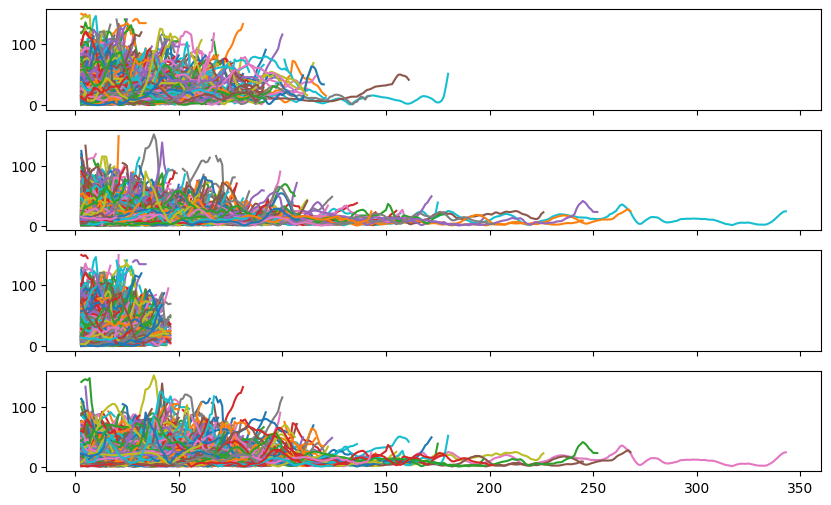

In [6]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(10, 6))
for d, df_data in enumerate(dfs):
    print(df_data.TiltDis.mean())
    for eddy in df_data.Eddy.unique():
        df = df_data[df_data.Eddy==eddy]
        axs[d].plot(df.Day-df.Day.iloc[0], df.TiltDis)


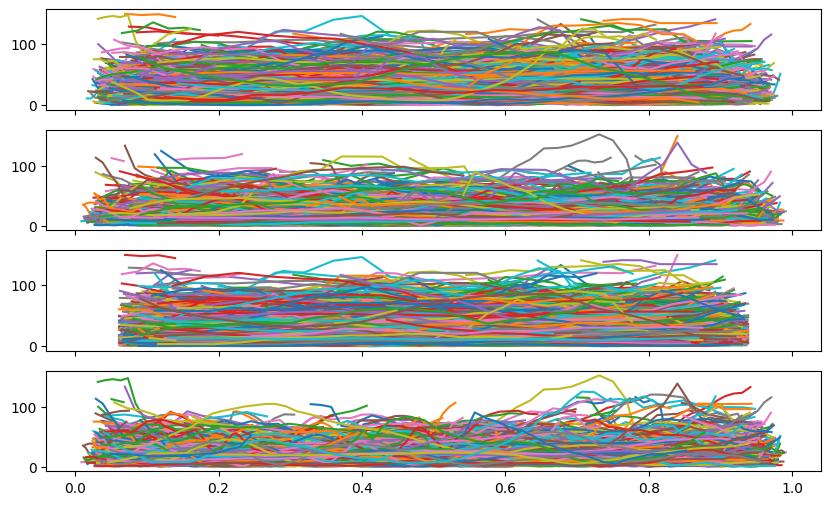

In [7]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(10, 6))
for d, df_data in enumerate(dfs):
    for eddy in df_data.Eddy.unique():
        df = df_data[df_data.Eddy==eddy]
        axs[d].plot((df.Day-df.Day.iloc[0])/(len(df)-1), df.TiltDis)


TD = 4.046276366506657 x + 27.69194531197654
TD = 0.22156729605587291 x + 17.08342016741891
TD = 1.1261402074225961 x + 23.669064113093015
TD = 2.223138162212493 x + 18.719295069456525


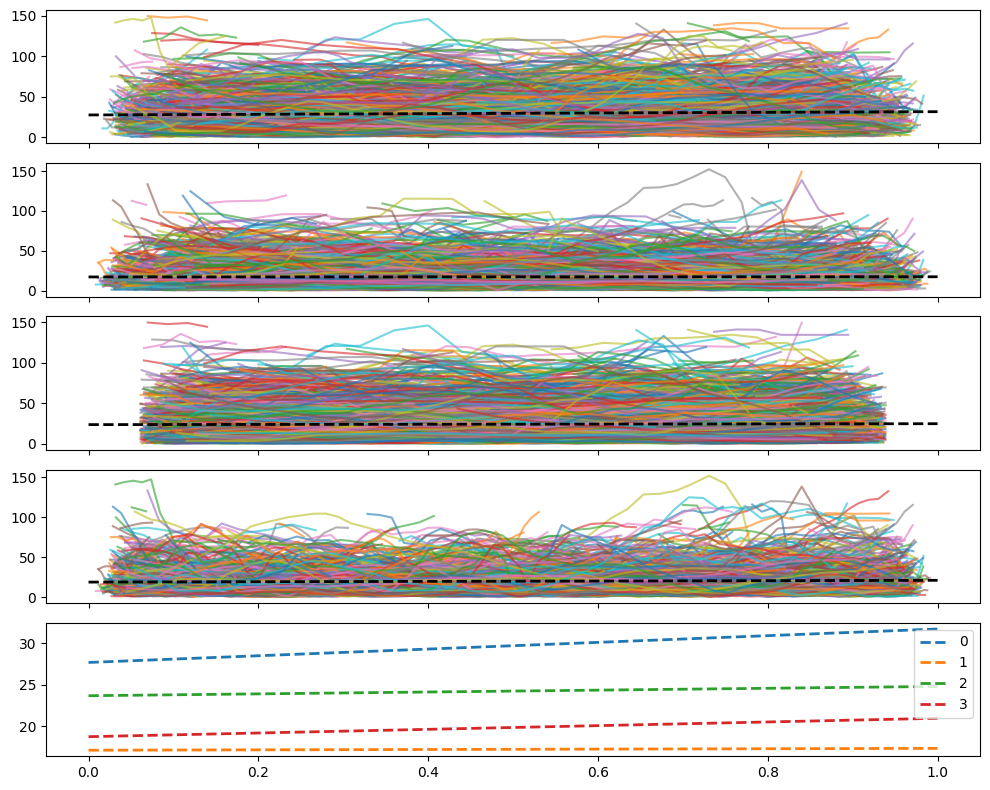

In [8]:
fig, axs = plt.subplots(5, 1, sharex=True, figsize=(10, 8))

for d, df_data in enumerate(dfs):
    all_x = []
    all_y = []

    for eddy in df_data.Eddy.unique():
        df = df_data[df_data.Eddy == eddy]

        x = (df.Day - df.Day.iloc[0]) / (len(df)-1)
        y = df.TiltDis

        axs[d].plot(x, y, alpha=0.6)

        all_x.append(x)
        all_y.append(y)

    # Combine all eddies for one linear fit
    all_x = np.concatenate(all_x)
    all_y = np.concatenate(all_y)

    mask = ~np.isnan(all_x) & ~np.isnan(all_y)
    m, b = np.polyfit(all_x[mask], all_y[mask], 1)

    axs[d].plot(all_x, m * all_x + b, 'k--', linewidth=2)
    print(f'TD = {m} t + {b}')
    axs[4].plot(all_x, m * all_x + b, '--', linewidth=2, label=f'{d}')
axs[4].legend()

plt.tight_layout()



In [9]:
shallow_eddies = []
h_thresh = 2000
for eddy in df_eddies.Eddy.unique():
    df = df_eddies[df_eddies.Eddy == eddy]
    mask = h[df.ic, df.jc] < h_thresh
    if mask.mean() > 0.5:   
        shallow_eddies.append(eddy)

df_shallow_eddies = df_eddies[df_eddies.Eddy.isin(shallow_eddies)]
df_shallow_eddies


,Eddy,Day,Cyc,Lon,Lat,ic,jc,xc,yc,w,...,q22,Rc,psi0,A,R,Age,Date,fname,TiltDis,TiltDir
343,9,1463,CE,160.821337,-29.752627,257,272,905.359734,1345.968165,-0.000018,...,0.698171,93.033224,44.232312,-0.005111,70.000382,59,1994-01-03,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
344,9,1464,CE,160.872937,-29.682713,258,274,908.039385,1355.109851,-0.000016,...,0.737886,102.163244,50.581886,-0.004853,69.875454,59,1994-01-04,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
345,9,1465,CE,160.924536,-29.612799,258,276,910.719037,1364.251536,-0.000015,...,0.777601,111.293265,56.931459,-0.004596,69.750526,59,1994-01-05,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
346,9,1466,CE,160.907885,-29.585707,258,277,908.347769,1366.565094,-0.000014,...,0.995614,112.490992,56.017181,-0.004427,72.501121,59,1994-01-06,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,29.153223,180.542295
347,9,1467,CE,160.838667,-29.651683,257,275,903.909489,1357.249742,-0.000015,...,0.984042,111.368190,52.769574,-0.004255,68.250290,59,1994-01-07,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,22.654006,174.278459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104952,2621,10613,AE,160.136087,-30.005400,248,262,849.507119,1296.282045,0.000008,...,0.728750,109.835356,-19.824846,0.001643,27.039907,22,2019-01-22,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
104953,2621,10614,AE,160.285316,-29.759817,249,269,855.801460,1327.265087,0.000009,...,1.330540,65.301877,-6.119447,0.001435,52.250524,22,2019-01-23,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
104954,2621,10615,AE,159.992027,-30.014642,246,261,836.457351,1290.498586,0.000010,...,0.569438,113.443493,-20.302961,0.001578,45.753267,22,2019-01-24,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
104955,2621,10616,AE,160.340658,-29.626619,249,272,856.848273,1343.217714,0.000007,...,0.793566,85.207528,-12.654447,0.001743,49.500371,22,2019-01-25,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN


(np.float64(0.0),
 np.float64(988.1356688684336),
 np.float64(0.0),
 np.float64(1561.702894718129))

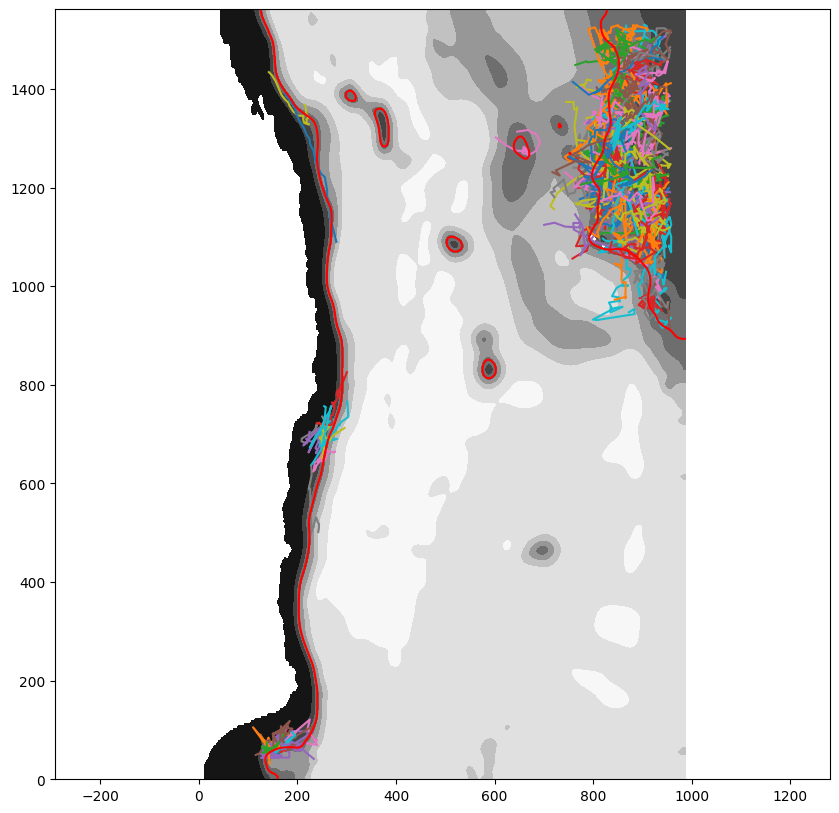

In [10]:
plt.figure(figsize=(10,10))
plt.contourf(X_grid, Y_grid, np.where(mask_rho, h/1e3, np.nan), cmap='Greys_r')
for eddy in df_shallow_eddies.Eddy.unique():
    df = df_shallow_eddies[df_shallow_eddies.Eddy==eddy]
    plt.plot(df.xc, df.yc)
plt.contour(X_grid, Y_grid, h/1e3, levels=[h_thresh/1e3], colors='r')
plt.axis('equal')


,Eddy,Day,Cyc,Lon,Lat,ic,jc,xc,yc,w,...,q22,Rc,psi0,A,R,Age,Date,fname,TiltDis,TiltDir
86747,2146,8980,CE,153.921148,-27.117049,64,282,174.701327,1390.803304,-0.000035,...,1.503420,50.196290,20.027141,-0.007948,27.001262,26,2014-08-03,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
86748,2146,8981,CE,153.968164,-27.269505,68,279,184.652473,1376.560576,-0.000040,...,1.514883,44.992491,17.852052,-0.008819,28.002998,26,2014-08-04,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
86749,2146,8982,CE,154.017447,-27.418349,72,276,194.665067,1362.763171,-0.000042,...,1.279911,44.264390,18.581549,-0.009484,29.251495,26,2014-08-05,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
86750,2146,8983,CE,154.000862,-27.515149,73,274,196.645064,1352.156873,-0.000034,...,1.403250,48.136723,16.660181,-0.007190,34.501197,26,2014-08-06,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,7.110777,319.139878
86751,2146,8984,CE,154.014543,-27.668142,76,271,203.476985,1336.728924,-0.000032,...,1.271391,46.729167,15.256047,-0.006987,30.753021,26,2014-08-07,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,4.738978,290.869442
86752,2146,8985,CE,154.046418,-27.800082,79,268,211.222195,1324.092710,-0.000031,...,0.995281,49.077675,16.733497,-0.006947,32.750506,26,2014-08-08,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
86753,2146,8986,CE,154.056110,-27.825974,80,268,213.059512,1321.727382,-0.000028,...,0.807150,57.141984,23.511066,-0.007200,35.500684,26,2014-08-09,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
86754,2146,8987,CE,154.060220,-27.960095,82,265,218.295840,1307.932525,-0.000028,...,0.914861,55.651711,21.010066,-0.006784,36.000620,26,2014-08-10,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
86755,2146,8988,CE,154.092110,-28.061003,84,263,224.896997,1298.513392,-0.000025,...,0.860926,52.686059,19.093860,-0.006879,37.002099,26,2014-08-11,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
86756,2146,8989,CE,154.067176,-28.142629,85,261,225.536482,1289.200341,-0.000023,...,0.641559,57.973841,20.010219,-0.005954,39.251592,26,2014-08-12,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN


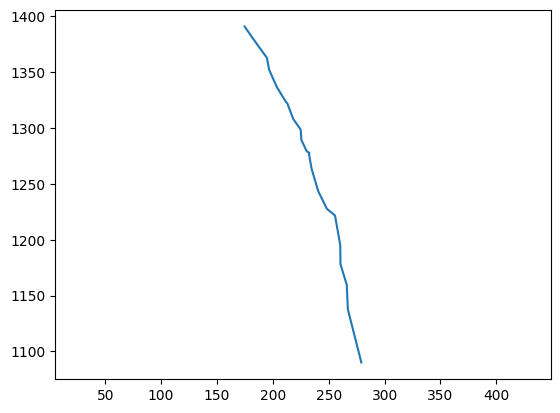

In [18]:
# df_shallow_eddies[(df_shallow_eddies.xc<400)&(df_shallow_eddies.yc>1000)]
df = df_shallow_eddies[df_shallow_eddies.Eddy==2146]
plt.plot(df.xc, df.yc)
plt.axis('equal')
df

34.249113052154534


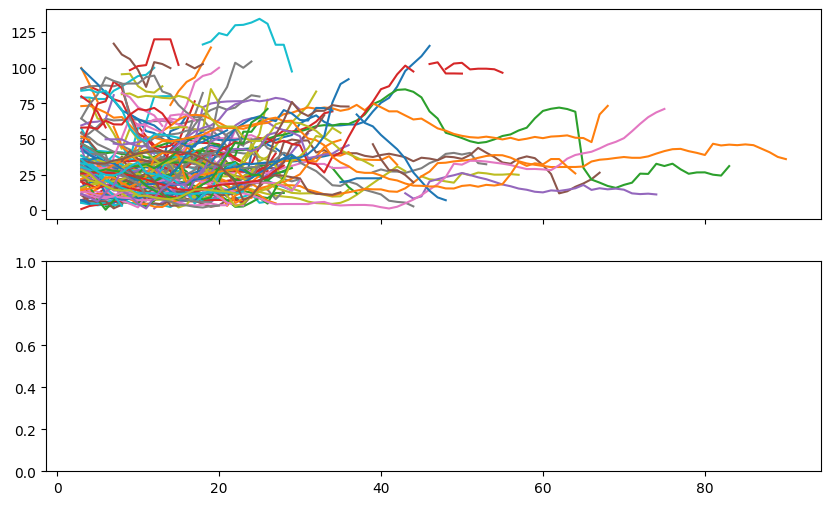

In [11]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
for d, df_data in enumerate([df_shallow_eddies]):
    print(df_data.TiltDis.mean())
    for eddy in df_data.Eddy.unique():
        df = df_data[df_data.Eddy==eddy]
        axs[d].plot(df.Day-df.Day.iloc[0], df.TiltDis)


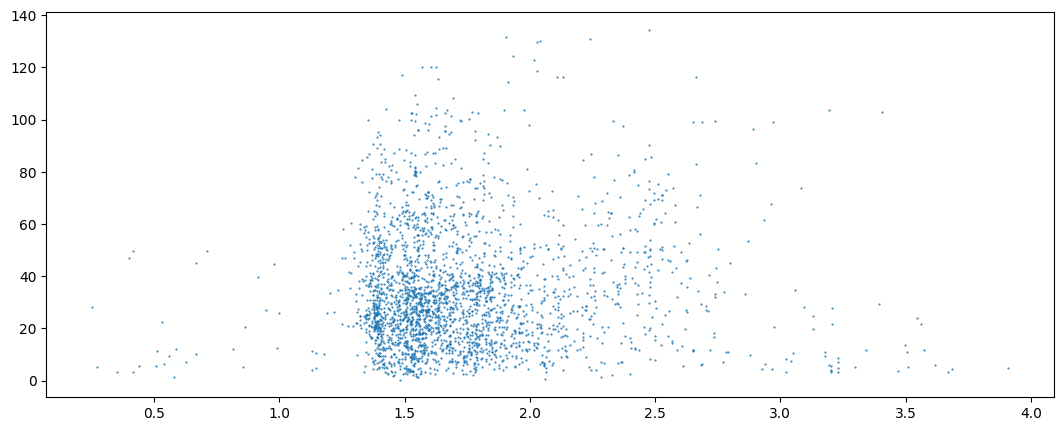

In [12]:
plt.figure(figsize=(13,5))
plt.scatter(h[df_shallow_eddies.ic, df_shallow_eddies.jc]/1e3, df_shallow_eddies.TiltDis, s=1, marker='.')


In [13]:
def plotter(k):
    plt.figure(figsize=(8,9))
    plt.contourf(X_grid, Y_grid, np.where(mask_rho, h/1e3, np.nan), cmap='Greys_r')
    
    for eddy in df_eddies.Eddy.unique():
        if (eddy > k*50) & (eddy < ((k+1)*50)) :
            df = df_eddies[df_eddies.Eddy==eddy]
            plt.scatter(df.xc, df.yc, s=df.TiltDis)
            plt.title(eddy)
    plt.axis('equal')
    plt.show()


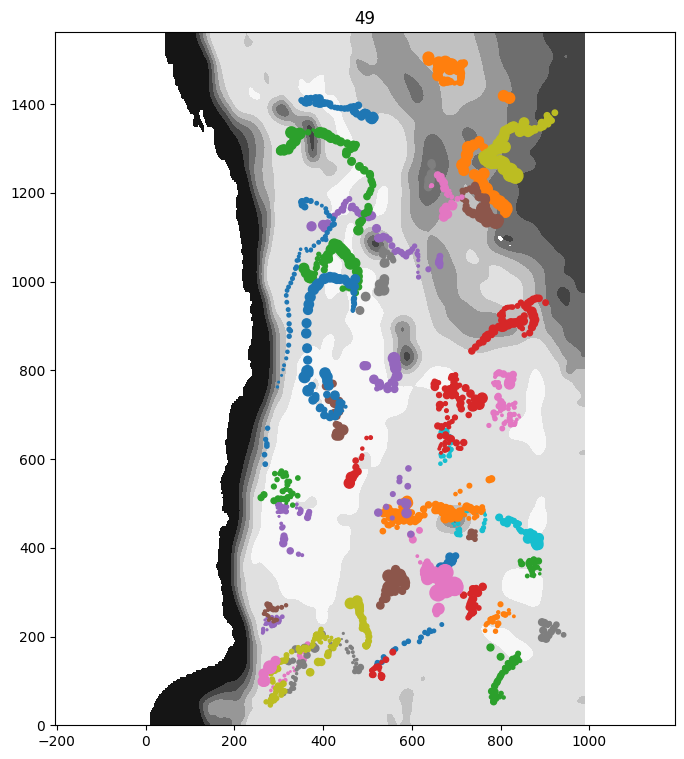

In [14]:
for k in range(1):
    plotter(k)
    